In Yoshua Bengio's paper on [practical recommendations for training gradient-based architectures][bengio] he says about the learning rate:

> This is often the single most important hyper-parameter and one should always make sure that
> it has been tuned (up to approximately a factor of 2). Typical values for a neural network
> with standardized inputs (or inputs mapped to
> the (0,1) interval) are less than 1 and greater
> than 10 −6 but these should not be taken as strict ranges and greatly depend on the parametrization of the model.
> A default value of 0.01 typically works for standard multi-layer neural networks but it would be foolish to rely exclusively on this default value. If there is only
> time to optimize one hyper-parameter and one
> uses stochastic gradient descent, then this is the
> hyper-parameter that is worth tuning.

Currently, the network that has been performing best for us (but not that well) is the `alexnet_based` architecture built by Matthew Graham for another project.

Previous results
======

We should look at the progress of previous results, see if we can see signs of overshoot (too high) or slow learning (too low):

[bengio]: http://arxiv.org/abs/1206.5533

In [1]:
import pylearn2.utils
import pylearn2.config
import theano
import neukrill_net.dense_dataset
import neukrill_net.utils
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import holoviews as hl
%load_ext holoviews.ipython
import sklearn.metrics

Using gpu device 0: Tesla K40c
:0: FutureWarning: IPython widgets are experimental and may change in the future.


Welcome to the HoloViews IPython extension! (http://ioam.github.io/holoviews/)
Available magics: %compositor, %opts, %params, %view, %%labels, %%opts, %%view


In [2]:
cd ..

/afs/inf.ed.ac.uk/user/s08/s0805516/repos/neukrill-net-work


In [15]:
settings = neukrill_net.utils.Settings("settings.json")
run_settings = neukrill_net.utils.load_run_settings(
    "run_settings/replicate_8aug.json", settings, force=True)

In [20]:
model = pylearn2.utils.serial.load(run_settings['alt_picklepath'])

In [25]:
c = 'train_objective'
channel = model.monitor.channels[c]

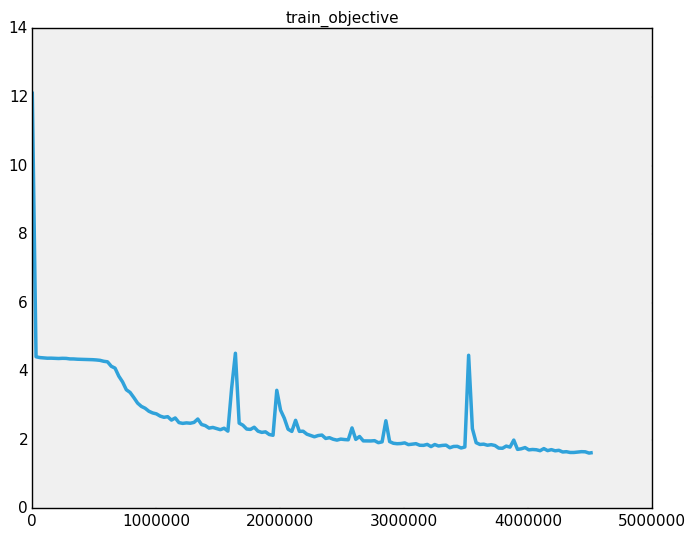

In [26]:
plt.title(c)
plt.plot(channel.example_record,channel.val_record)

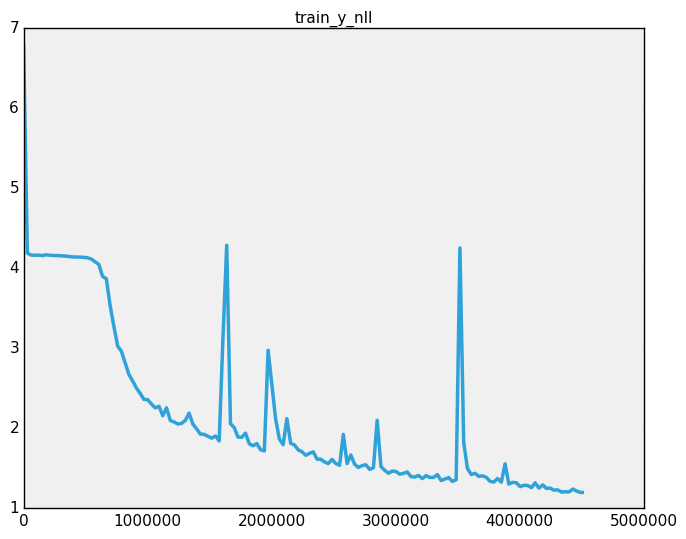

In [28]:
c = 'train_y_nll'
channel = model.monitor.channels[c]
plt.title(c)
plt.plot(channel.example_record,channel.val_record)

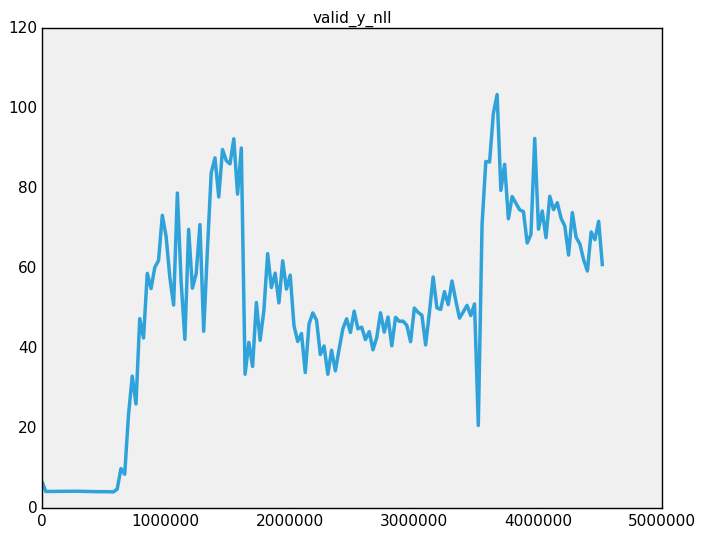

In [29]:
def plot_monitor(c = 'valid_y_nll'):
    channel = model.monitor.channels[c]
    plt.title(c)
    plt.plot(channel.example_record,channel.val_record)
    return None
plot_monitor()

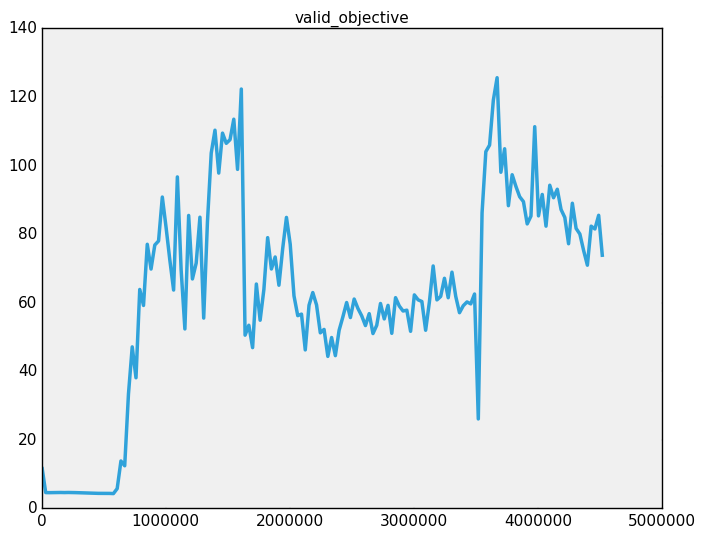

In [31]:
plot_monitor(c="valid_objective")

Would actually like to know what kind of score this model gets on the check_test_score script.

In [33]:
%run check_test_score.py run_settings/replicate_8aug.json

Log loss: 28.8111648568


So we can guess that the log loss score we're seeing is in fact correct. There are definitely some bugs in the ListDataset code.

The other model that we've run using it is the following:

In [36]:
run_settings = neukrill_net.utils.load_run_settings(
    "run_settings/online_manyaug.json", settings, force=True)

In [37]:
model = pylearn2.utils.serial.load(run_settings['alt_picklepath'])

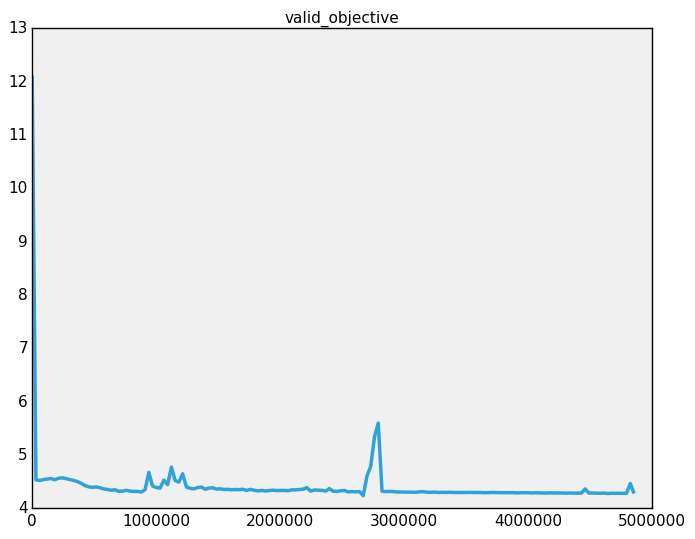

In [38]:
plot_monitor(c="valid_objective")

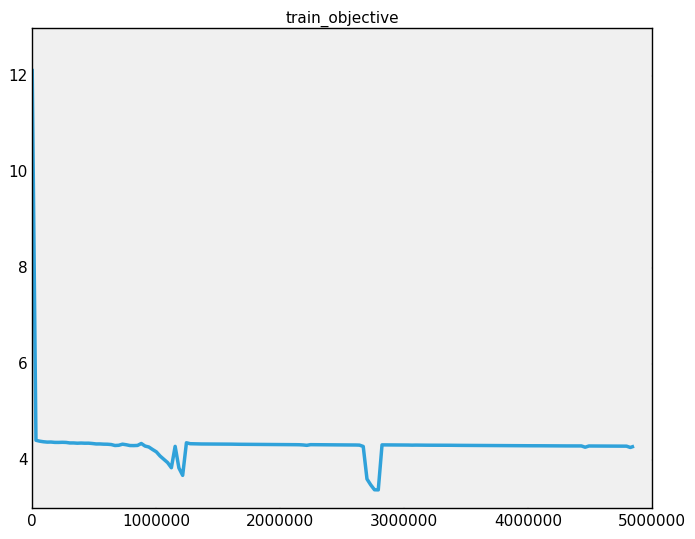

In [39]:
plot_monitor(c="train_objective")